**Sam Alim Ramadhan**

**1103210236**

**TK-45-05**

**Dataset: Mall_Customers**

**Clustering**

In [ ]:
# Melakukan mounting pada Google Drive tempat dimana dataset disimpan
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Melakukan import terhadap library atau modul yang diperlukan pada program
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# Memanggil directory dari dataset pada dataset dan meletakkannya pada variabel baru untuk mempermudah penggunaan
url = "/content/drive/MyDrive/Machine Learning/Mall_Customers.csv"
data = pd.read_csv(url)

In [ ]:
# Menghapus CustomerID, "inplace = True" digunakan agar hasil perubahan langsung diterapkan pada dataset
data.drop(columns = ["CustomerID"], inplace = True)

In [ ]:
# Menampilkan informasi tentang dataset yang digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# Menampilkan beberapa baris teratas dari dataset yang digunakan
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Menampilkan beberapa baris terbawah dari dataset yang digunakan
data.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


ChatGPT Prompt: Beri kode untuk mengubah judul fitur "Genre" menjadi "Gender"

In [ ]:
# Mengganti judul fitur 'Genre' menjadi "Gender"
data.rename(columns = {'Genre': 'Gender'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


ChapGPT Prompt: Beri kode untuk konversi tipe data kategorikal menjadi numerik.

In [ ]:
# Konversi tipe data Gender menjadi numerik
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

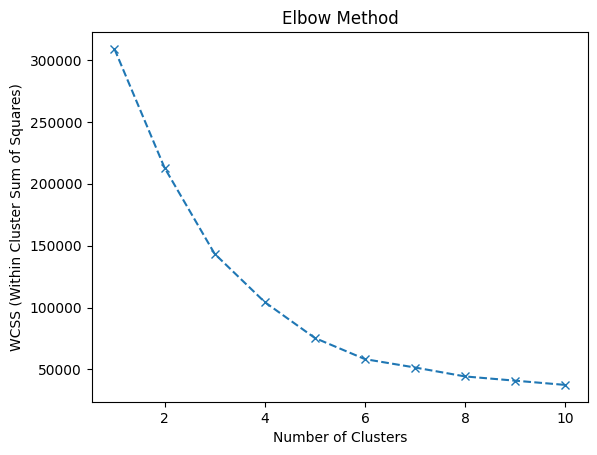

In [ ]:
# Menghitung inersia untuk berbagai jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker = 'x', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

ChatGPT Prompt: Beri kode untuk membuat kluster sebanyak 6 clusters

In [ ]:
# Melatih model K-Means dengan 6 kluster
kmeans = KMeans(n_clusters = 6)
kmeans.fit(data)

# Menambahkan label kluster ke Dataframe
data['Cluster'] = kmeans.labels_

data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,1
1,0,21,15,81,5
2,1,20,16,6,1
3,1,23,16,77,5
4,1,31,17,40,1
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,2
197,0,32,126,74,0
198,0,32,137,18,2


ChatGPT Prompt: Beri kode untuk visualisasi hasil klustering dengan x = 'Annual Income (k$)' dan y = 'Spending Score (1-100)'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


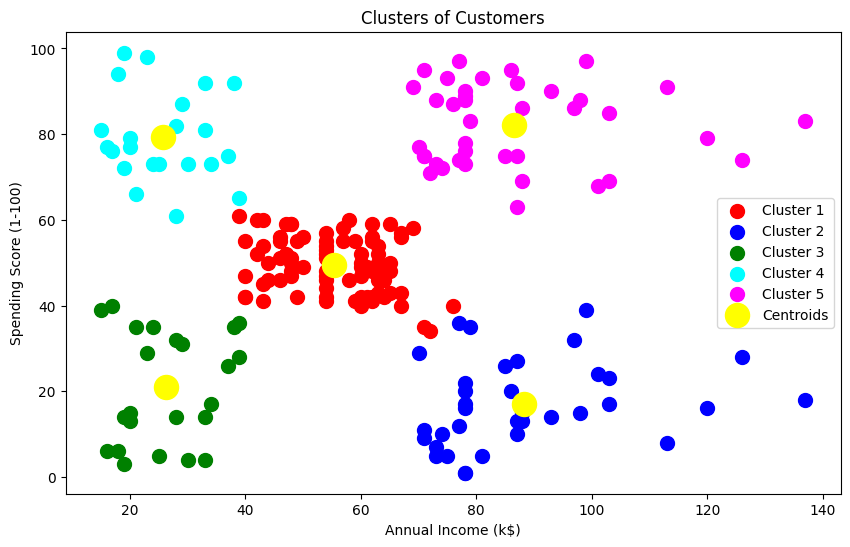

In [ ]:
# Memilih fitur untuk klastering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Membangun model K-Means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

ChatGPT Prompt: beri kode untuk melakukan evaluasi K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For 2 clusters: Inertia = 181363.60, Silhouette = 0.30, Davies-Bouldin = 1.26
For 3 clusters: Inertia = 106348.37, Silhouette = 0.47, Davies-Bouldin = 0.72
For 4 clusters: Inertia = 73679.79, Silhouette = 0.49, Davies-Bouldin = 0.71
For 5 clusters: Inertia = 44448.46, Silhouette = 0.55, Davies-Bouldin = 0.57
For 6 clusters: Inertia = 37233.81, Silhouette = 0.54, Davies-Bouldin = 0.65
For 7 clusters: Inertia = 30259.66, Silhouette = 0.53, Davies-Bouldin = 0.72
For 8 clusters: Inertia = 25011.84, Silhouette = 0.46, Davies-Bouldin = 0.75
For 9 clusters: Inertia = 21862.09, Silhouette = 0.46, Davies-Bouldin = 0.76
For 10 clusters: Inertia = 19672.07, Silhouette = 0.46, Davies-Bouldin = 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


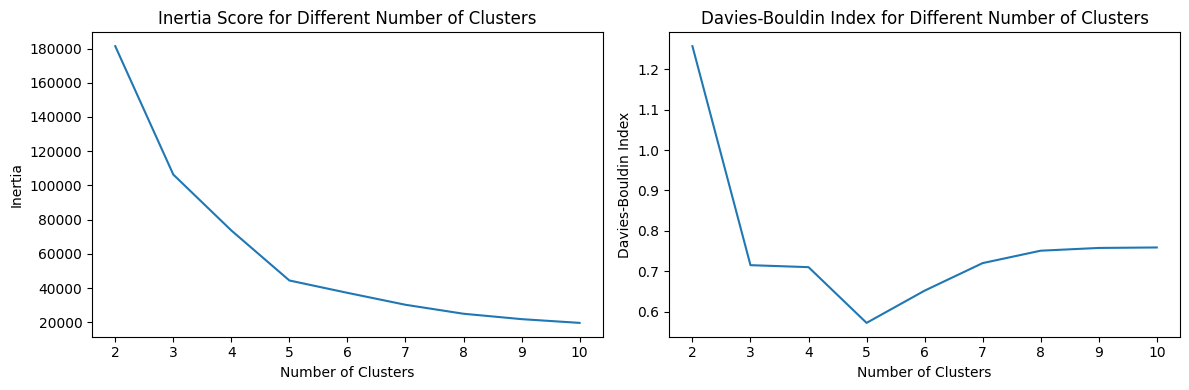

In [ ]:
# Menginisialisasi list untuk menyimpan inertia scores dan Davies-Bouldin index
inertia_scores = []
davies_bouldin_scores = []

# Mencoba jumlah cluster dari 2 hingga 10
for n_clusters in range(2, 11):
    # Membangun model K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Menghitung inertia score
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)

    # Menghitung Davies-Bouldin index
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    print("For {} clusters: Inertia = {:.2f}, Silhouette = {:.2f}, Davies-Bouldin = {:.2f}".format(n_clusters, inertia, silhouette_avg, davies_bouldin))

# Plotting Inertia scores
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_scores)
plt.title('Inertia Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plotting Davies-Bouldin index
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), davies_bouldin_scores)
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()